# Topics
## Logistic Regressison classification
1. defining Sigmoid function
2. defining the numpy Array and scaling the image
3. Initialization the weights and bias
4. Implementing the forward propagation and cal the error function
5. Optimazation Algorithm with gradient descent.
6. Implementing the back propagation and using iteration to update the weights and bias with learning rate.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [12]:
x_l= np.load('Signs_Data/X.npy')

In [13]:
y_l= np.load('Signs_Data/Y.npy')

In [14]:
x_l.shape

(2062, 64, 64)

In [15]:
y_l.shape

(2062, 10)

(-0.5, 63.5, 63.5, -0.5)

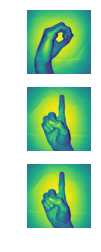

In [43]:
plt.subplot(3, 1, 1)
img_size = 64
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(3, 1, 3)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [45]:
X=np.concatenate((x_l[204:409],x_l[822:1027]),axis=0)

In [46]:
z = np.zeros(205)
o = np.ones(205)
Y=np.concatenate((z,o),axis=0).reshape(X.shape[0],1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
Our label array (Y) is already flatten(2D) so we leave it like that.
Lets flatten X array(images array).

In [50]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

In [52]:
X_train_flatten.shape,X_test_flatten.shape

((348, 4096), (62, 4096))

As you can see, we have 348 images and each image has 4096 pixels in image train array.
Also, we have 62 images and each image has 4096 pixels in image test array.
Then lets take transpose. You can say that WHYY, actually there is no technical answer. I just write the code(code that you will see oncoming parts) according to it :)

i.e each image is in each column

In [53]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T

In [54]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4096, 348), (4096, 62), (1, 348), (1, 62))

# Initializing parameters

As you know input is our images that has 4096 pixels(each image in x_train).
Each pixels have own weights.
The first step is multiplying each pixels with their own weights.
The question is that what is the initial value of weights?
There are some techniques that I will explain at artificial neural network but for this time initial weights are 0.01.

Okey, weights are 0.01 but what is the weight array shape? As you understand from computation graph of logistic regression, it is (4096,1)

Also initial bias is 0.
Lets write some code. In order to use at coming topics like artificial neural network (ANN), I make definition(method).

In [55]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

## Forward Propagation:

z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)

Then we put z into sigmoid function that returns y_head(probability).
Then we calculate loss(error) function.
Cost function is summation of all loss(error).

sigmoid(z):


In [56]:
def sigmoid(z):
    y_head= 1/(1+np.exp(-z))
    return y_head

## Caliculating the loss term
loss or error
1. input as image
2. multiply with weight and add bias = z
3. pass z to sigmoid(z) return y_head
4. if y_head>0.5 is 1 else y_head<0.5 it is 0

    #loss term for Logistic is -(1-y)log(1-y_head)-y(log(y_head))

## Caliculating the cost function
Cost function is the summation of loss function
Each image creates loss function

Cost function is summation of loss functions that is created by each input image.

## Forward propagation
defining the forward propagation

In [62]:
def forward_propagation(w,b,x_train,y_train):
    z=np.dot(W.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1] # scaling to number of examples
    return cost

# optimization of algorithm with gradient descent

--> To increase the accuracy we need to reduce the cost.

--> To reduce the cost we need to update the Weights and Bias of the equation

--> Model will learn the parameters weights and bias that minimize the cost function This called ##Gradient Descent.

Updating the cost function with minimum point of cost function

to find the slope(derivative of the current function) to get the slope and update the weights to reduced to slope

And Again do the forward propagation check for the cost function

### slope of cost function
slope of function(cost function) at given point(at given weight) we take derivative of function at given point.

slope(derivative) gives both step and direction of step.

Steps:
1. Take derivative of cost function according to weight and bias
2. hen multiply it with α learning rate.
3. Then update weight.

    W=W-α(dJ(w,b)/d(w,b))
    
    ∂J/∂w=1/m* x(y_head−y)T
    
    ∂J/∂b=1/m∑(y_head−y)

In [63]:
# we update the backward and forward propagation 
def forward_propagation(w,b,x_train,y_train):
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss= -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight= (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # derivative for log loss function
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

## Updating the parameters (Weights and Bias) after back prop



In [64]:
def update(w,b,x_train,y_train,learning_rate,number_of_iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    
    for i in range(number_of_iterations):
        cost,gradients= forward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update the weights
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
        
    

## Till here we have made algorithm to learn now we use predict on #Test set

In [66]:
def predict(w,b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    return Y_prediction

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


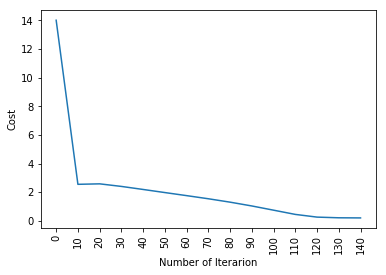

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [67]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

## Logistic with Sklearn 

In [68]:
from sklearn import linear_model
logreg =linear_model.LogisticRegression(random_state = 42,max_iter= 150)

print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))

train accuracy: 1.0 
test accuracy: 0.967741935483871 
